In [188]:
library(tidyverse)
library(readr)
library(tidyr)
library(leaps)


### Read the data from web to R

In [189]:
## Read data from website
url <- "https://raw.githubusercontent.com/Rz02/STAT_301_Group_38/main/Data/winequality-red.csv"
df <- read_csv(url)

red_wine <- separate(df, 
                     `fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality`,
                     into = c("fixed_acidity", "volatile_acidity", "citric_acid",
                              "residual_sugar", "chlorides","free_sulfur_dioxide",
                              "total_sulfur_dioxide","density","pH","sulphates",
                              "alcohol","quality"),
                     sep = ";")
head(red_wine)

Rows: 1599 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): fixed acidity;volatile acidity;citric acid;residual sugar;chlorides...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


### Dataset introduction:
This data set includes red vinho verde wine samples from northern Portugal. The input variables of this dataset are objective physicochemical tests such as (PH value). The only target variable is the score. It goes from 0 to 10, the output based on sensory data. It is the median of at least three evaluations made by wine experts. 
It is created by Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009.

### Variable Description:
This dataset includes 1599 observations and 12 variables. The first 11 variables are the feature variables. The last variable is the target variable, called the quality score.

   1 - fixed acidity (continuous)
   2 - volatile acidity (continuous)
   3 - citric acid, (continuous)
   4 - residual sugar, (continuous)
   5 - chlorides (continuous)
   6 - free sulfur dioxide (continuous)
   7 - total sulfur dioxide (continuous)
   8 - density, (continuous)
   9 - pH (continuous)
   10 - sulphates, (continuous)
   11 - alcohol, (continuous)
   12 - score, (Integer)

### My question:
In this course, my interest part up to now is creating the generative model, so my question for this dataset will be: What variables should we choose to get the best fit generative model with quality score as response value, and what is the coeficient for each parameter?

As we all know, the quality scores of red vinho verde wine are determined by judges, meaning they are very subjective. , so I want to find the association between the chemistry and physical parameters of wine and the quality score. Also, For the given wine, we expected to change the quality score based on the changing of some parameters.

My question focuses on the inference (Creating a best generative model based on the given data and understanding the association between each variable and the response value).

### Clean the dataset

In [190]:
## Change the datatype for each variable from chr to dbl
cols_to_convert <- 1:12 
# Use lapply to convert the specified columns to numeric
red_wine[, cols_to_convert] <- lapply(red_wine[, cols_to_convert], as.numeric)
head(red_wine)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


### Visualization

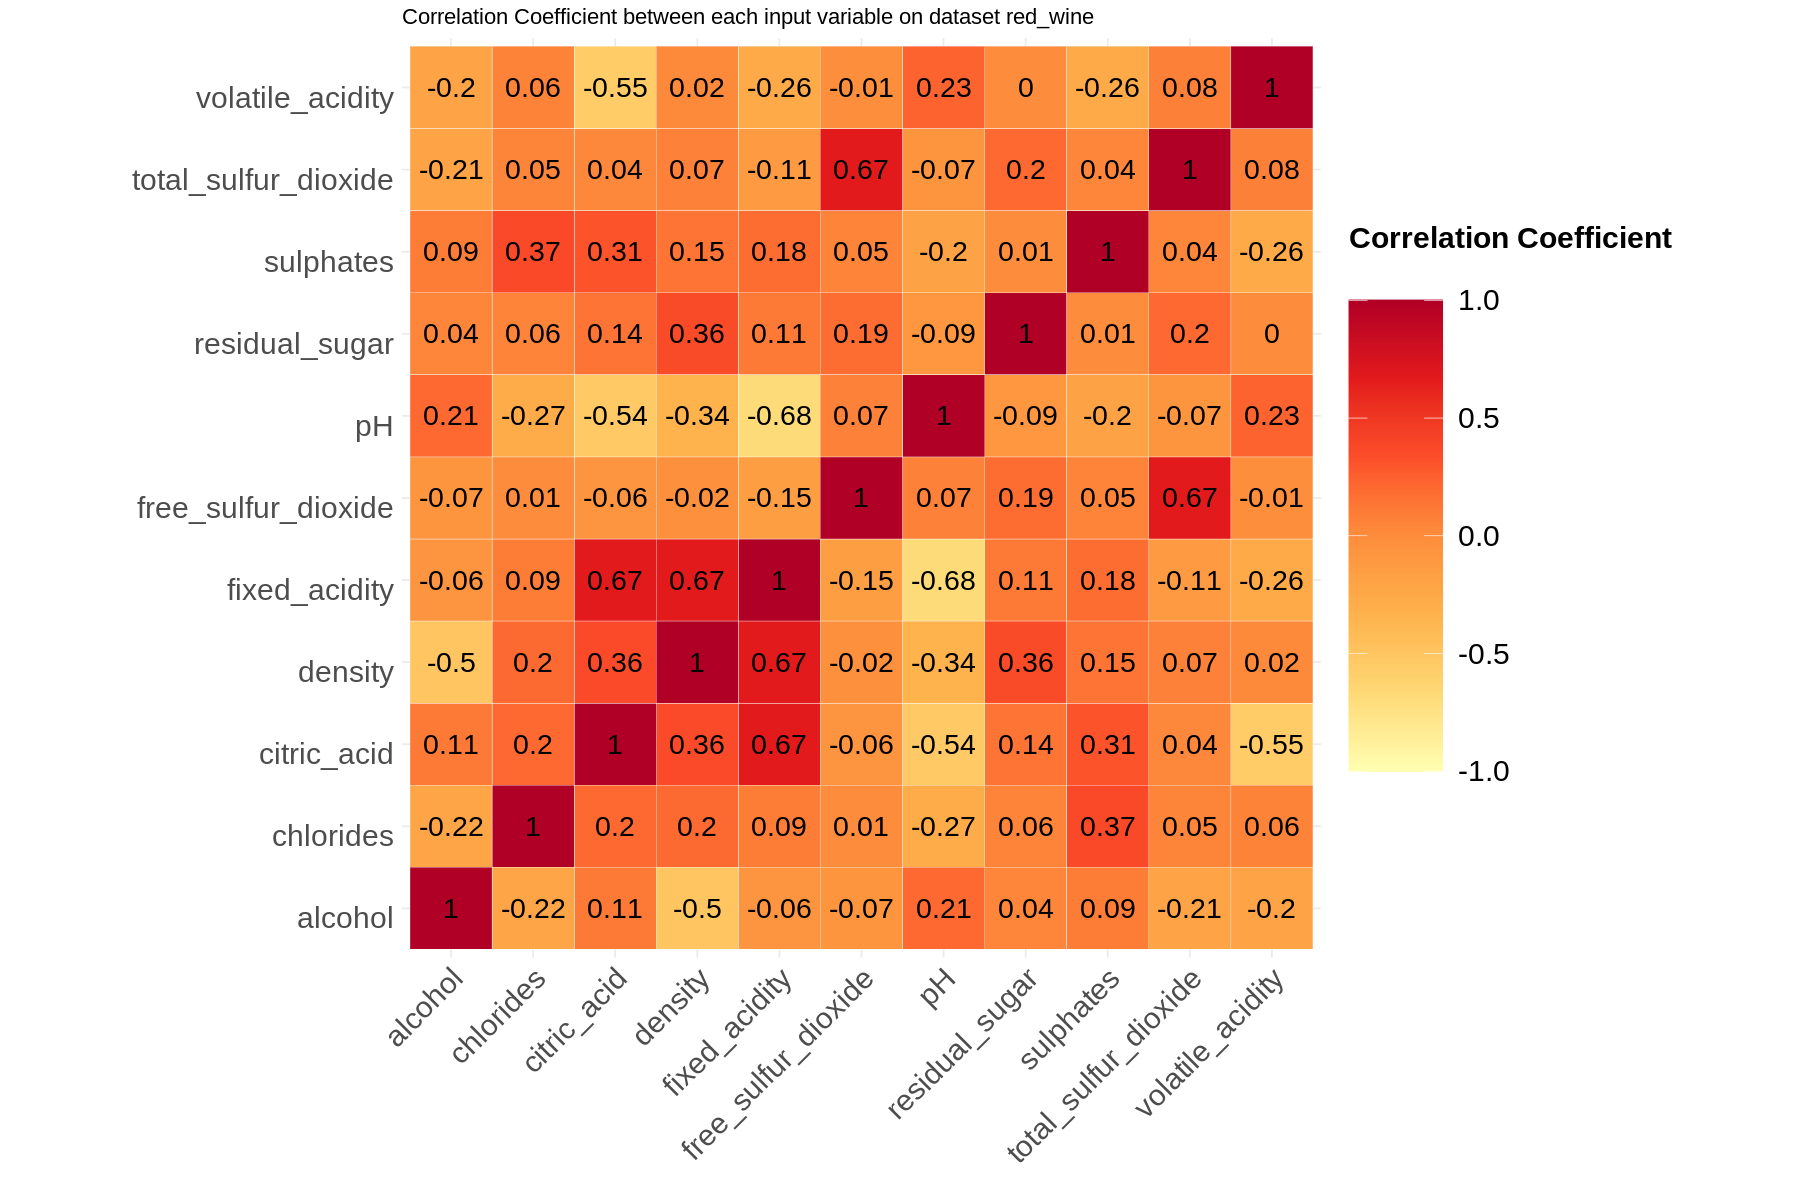

In [191]:
## Check multicollinearity in the dataset
corr_matrix_CASchools <- red_wine %>%
  select(- quality) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")

options(repr.plot.width = 15, repr.plot.height = 10)
plot_corr_matrix_CASchools <- corr_matrix_CASchools %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd",
    direction = 1, limits = c(-1, 1)
  ) +
  labs(x = "", y = "") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)+
  ggtitle("Correlation Coefficient between each input variable on dataset red_wine")

plot_corr_matrix_CASchools

### Why we need to check correlation coefficient?

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it challenging to isolate the individual effect of each predictor on the dependent variable. Since we want to determine the best generative model, the variable that causes multicollinearity should be removed. This visualization indicates that in the dataset red_wine, there is a variable that leads to multicollinearity.

In [192]:
##MLR for with all other variable as input
MLR_redwine <- lm(formula = quality ~ ., data = red_wine)
MLR_redwine_results <- tidy(MLR_CASchools) %>% mutate_if(is.numeric, round, 2)
MLR_redwine_results

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),21.97,21.19,1.04,0.30
fixed_acidity,0.02,0.03,0.96,0.34
volatile_acidity,-1.08,0.12,-8.95,0.00
citric_acid,-0.18,0.15,-1.24,0.21
residual_sugar,0.02,0.02,1.09,0.28
chlorides,-1.87,0.42,-4.47,0.00
free_sulfur_dioxide,0.00,0.00,2.01,0.04
total_sulfur_dioxide,0.00,0.00,-4.48,0.00
density,-17.88,21.63,-0.83,0.41


In [193]:
## Use vif() to determine which variable we need to remove
VIF_MLR_CASchools <- vif(MLR_redwine)
VIF_MLR_CASchools

fixed_acidity     volatile_acidity          citric_acid 
            7.767512             1.789390             3.128022 
      residual_sugar            chlorides  free_sulfur_dioxide 
            1.702588             1.481932             1.963019 
total_sulfur_dioxide              density                   pH 
            2.186813             6.343760             3.329732 
           sulphates              alcohol 
            1.429434             3.031160

The smallest the VIF, the lower the sign of multicollinearity, therefore I choose to remove "fixed_acidity" in the dataset.

In [194]:
redwine_wrangling <- red_wine %>% select(-fixed_acidity)
head(redwine_wrangling)

volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [195]:
MLR_redwine_wrangle <- lm(formula = quality ~ ., data = redwine_wrangling)
MLR_redwine_wrangle_results <- tidy(MLR_redwine_wrangle) %>% mutate_if(is.numeric, round, 2)
MLR_redwine_wrangle_results

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),6.18,13.44,0.46,0.65
volatile_acidity,-1.08,0.12,-8.91,0.00
citric_acid,-0.14,0.14,-0.98,0.33
residual_sugar,0.01,0.01,0.75,0.46
chlorides,-1.97,0.41,-4.83,0.00
free_sulfur_dioxide,0.00,0.00,2.13,0.03
total_sulfur_dioxide,0.00,0.00,-4.83,0.00
density,-1.52,13.39,-0.11,0.91
pH,-0.55,0.13,-4.10,0.00


### Explanation for wrangling dataset and potential problems

This table is the final wrangling dataset before we decide which method to use to produce the best-fitting generative model. Compared with the original data set, it has one less input variable, fixed_acidity.

However, this table still has some potential problems that will affect the selection of variables in the next step. First, the p-value of the Intercept is too high, which shows that there is not enough evidence to show that using these ten variables as input is better than using the average quality score to predict. It might be a potential problem in the later work. Suppose the p-value of the Intercept is still high after we determine the input variables included in the best-fitting generative model. In that case, we might need to consider the input and output in this dataset do not have a linear relationship.

Similarly, "citric_acid," "residual_sugar," and "density" also have higher p_value, which indicates that these variables may be the inclusion variables of the best-fitting model, but they may not related to quality when other variables are constant. The linear relationship of the score is not statistically significant.